# Rimless Wheel dynamics

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/syndr/Wouter/Onderzoek/Projecten/tue/compasswalker/actinf-compasswalker`


In [2]:
using Base64
using LinearAlgebra
using Distributions
using CairoMakie

In [3]:
# Frames per second
fps = 60

60

In [4]:
function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
    base64encode(open(read,filename)),"""" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

## System

![](figures/rimlessWheel.svg)

In [5]:
m = 1.0
ℓ = 0.2
γ = 0.2 # 0 < γ < 2π
α = π/6
const g = 9.81

9.81

## Start from stance

In [6]:
function animwheel(θt::Vector{Float64}, contact::Vector{Float64})

    f = Figure(resolution=(800,700))
    ax = Axis(f[1, 1])

    # Angle
    θk = Observable(0.0)

    # Slope
    poly!(ax, Point2f[(0, 0), (1, 0), (0, tan(γ))])
    CairoMakie.ylims!(ax, [0.,1.])

    # Standing spoke
    xk = @lift([contact[1], contact[1] + ℓ*sin($θk)])
    yk = @lift([contact[2], contact[2] + ℓ*cos($θk)])
    lines!(xk, yk, linewidth=5, color=:black)

    # Center hub
    centerx = @lift([contact[1]+ℓ/2*sin($θk)])
    centery = @lift([contact[2]+ℓ/2*cos($θk)])
    CairoMakie.scatter!(centerx, centery, marker=:circle, markersize=20, color=:black)

    # All spokes
    for n in 0:5
        xk = @lift([contact[1]+ℓ/2*sin($θk), contact[1]+ℓ/2*sin($θk)+ℓ/2*sin($θk+n*2α)])
        yk = @lift([contact[2]+ℓ/2*cos($θk), contact[2]+ℓ/2*cos($θk)+ℓ/2*cos($θk+n*2α)])
        lines!(xk, yk, linewidth=5, color=:black)
    end

    # Write animation
    record(f, "rimless-wheel.mp4", θt; framerate = 30) do θ
        θk[] = θ
    end
end

animwheel (generic function with 1 method)

In [7]:
Δt = 0.001
time = range(0, stop=1.0, step=Δt)
T = length(time)

1001

In [8]:
function eom(z,t)
    return [z[1] + Δt*z[2]; z[2] + Δt*(g/ℓ*sin(z[1]))]
end

eom (generic function with 1 method)

In [9]:
# Preallocate
z_ = zeros(2,T)

# Initial condition
z_0 = [0.0, 1.0]
z_kmin1 = z_0

for (n,t) in enumerate(time)
    
    # Forward simulation
    z_[:,n] = eom(z_kmin1, t)
    z_kmin1 = z_[:,n]
    
end

animwheel(z_[1,:], [0, tan(γ)])

"rimless-wheel.mp4"

In [10]:
display_mp4("rimless-wheel.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAEXmBtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABWFZYiEADf//veBvzLLXx576uAt6KuEAti0w3Gz3Rq4DVs66B4H0KbCYMxXoBU/YYQI7bQsq5E8NlkGHdq3m8sIyPsCWxFVN03xbG1kh3bRRklrS2QKNmKPVmQBP4elmNcZAcUOTB2CaCkbiR+CBpw+v0IQrkWboC0ilBPceDrcc7mFrx9JK4WZ5FtzhsSPAgAAAwAAAwAAAwADn7+ChhUuFVxn4xA3FmNGOqhqr+fmCeH47cDEpwIYaSJI7Ws7b5HXKxvsCYvCbA/2+h7dx1UqO6wZVMVy108BX2aWsNo4LoeX31f50gNIN3IMwTbxoiSVNBXw8oZXLmaK/XLYJB6zob+eiorGDBMvr3OPUkkseBRJLWtMHY0Yu4DQJBgKSmj+0H6+H8BDh20QoeAEoenFFnvlad75v7BdelG5/8GHjrfosXj9IpLABCeHTnon5Jubsfu6p5/wAYQ4eFrSUWDjcm8A9zDpnf2Df+oy0gI8C9QWdywodzpNF0vGzqAALleAAQPbKwzGFnSd3sgAAAMBwwClhWHNAAdlGGJNqgAJGlZi3IAS6GJIbmVQBRHSHMF1QC1fAlDMgwA25j1kYSAg3YgAGuAK/zHxqtHJGOUQq9jnoUwIFM4tthAUcjTxTr+2DsLmEbr4s51jVO9B8Hl19OeWrNH9BAWhULRravZdqapFIBaodwtXT6DKVSCGPo6KOBtYOi4xHhAoYLtTodiSWNJYdDaJzaQleknRF3WBtOUvJuJReZdp/o36rx4jr659R0oQT6ksghXKsLO7EomwJwtHZ5BvB8G6Zixsax9oWI7b9Vjmt+z12porSjhT8G/7Mn761rFOYOxk1kBixJSnYUo2bSrVCz4qwnxVHuqbqMxb/AoZh8FclMl+UlVING82OGBy1a9S895d643rgAduUrG1n+eDfu8+FqeoErMSpj02oPt8VhsV+GBJxJzqetahLyoC1O98ccXytdLyiIC49P/+JnSeBocjlnjxvzu5jADd+2nB7hi6AuKMAONWGYcz7dbEaBDd5fQoySLlu2lo1QRQ2qz9zc5jeVRpeCPAn/StV2QABksRisFnbCd/V3YlsC/LqKKoTK6fUG6LWeoVu6EGQV4BZdGUA4FCknyfsRlcc8O1HsbC/EH+m9pVjTOlF86DzGShqOwPSfvZ2LL/fwqXc6KE9i2SXaNzxJlZLH47tPie4ZyKkw702sL+2t9SAZP4a6RxTXMaJ/96N5BNIKnYvV2j1GH5aCK7Dt6wjSUglAiaAm77n0zEZSvcLL9k8THNsXZd/AolZZcovMcTJ2JnEG/7PIAz9kct/eP1Iy+5O5Y4+FqAnwWcBhwpkkBNSd+UaCxyOVHT7rTLLjtjHhryFoZ+j5S15KUgI9oZy/X6ulTJGtW+PHb8/OZGcAdguTVhQvXGxV84U1nLQEg1UYsmcvVOtAOUA7huJMfi0JaMcpVwDTko8f/cTczh9mq0PS++priqQ9n+D4OwojNyOhWoTkNigpmQysNsMY7LihF/LqGgay7lW1DuYWB07ujuxZDgXjk1HIV8lmulc+dXzKL1Xf07h7c7NLtbWKr2unU31mK4cRrex9L42xXxqyDR4M0tfrwArXNwgqsO+CF5KvC91kauESe8LNahBkv6odLu4BemMJ42k2dbXDeRgyAAD9xJZg00HaprhCCCxw4CEVUs60XK9tDZqbJhs3ezxNJDdd4FbR9e/PtKLKU3ojzFSfOxnxps7mgGvXVfx5Jm0Xh42/ysPg5liVwdviAF0jCWDhEALLj6DjMZ6S8JN59qawEcd65x+4V90zEgrNSYfr0aZyttvcK4r6xc7Dx4o4FScQSBDVU9oJEzb3JoLxtIsofg7KFrXr+3MQWhBN9Z0FaECo3VN1zre7G25rN+BOaSTKOJ8V2EaC4T+atPR8gW+hyUvqzg6h0h+B10kUVpft8CXGEXX0GEhd56ezNGDVyZY6W/ID2MLQCEFODmcNKztuViElZeHQf/imOCXSOARpKBA9XTZY+1vos/TE+kCBOnX4KbYLqV6I4qeJzjUpDJN6EindyqokxEw/FiACDNW5Owtq7PewwNAIDGImhWXeW6lnny1u1tPIrlrEZSmENtV+8wpgi/nntw9DdNvX1rln8h90HoWSR2fxU/Hx0Ks8/ZM1A34YdZJnbCxd+Yi9z1WTO5Rrraq2oEElEjVxjPy/QaxsJnvlyy325Bf4Mzt8CSzdGODNsYYK/Z0OEC3w+1rlCBwBgjclYuQET0fp9FwV2Yn/J93QeVLH6uTB1PI5r92nm4hT/dVR0/cQ8t6ooDUgW7HHuN7w/zBVOGPUawqDHrsiuLvgizM0JWk0fNE1iMLmKn+0+myxAGkjSe4VWveMlq3zdTcMjZBO2ZfAAcaObcpqKW26OqoTTwZVXlQKL7uBzh1AALXKFxav+m7TpuvD+y9ErL2XxeAFIiVCy5kdxZAseRTpcB0ix0WwakAlvku1wEl6CwjDYHzHX3ZffqnrtXmXC4g5H0rvzVkfyKARCWA3JFknfN+sg5BfGcMwyWArnXSla1mv20y7COEBko/g9vkPX/RwjNOgaKXGt/w+NfYkA4Kd4YOAsp0eYJl2zRb393+FwQ8tigmLa2gwrDiu2CV20yBLks4WMzYKphXu3fC3o8X9MaeZ6zgHpYSUrpsYub2wJXMd5bs1gDr6n6oVGjLAG0P7Kr/ga1nMeau6IiFeStgG/Go7govrbV9Dp8JyMfkP9tQmmtlbZ6GMK4fmTxdZEhXLNvH3yeErtC38jWzclIoa0f7UmLZMcU+sV2POHTm3UqrfNM3SLOOQY8XTucs1vaSS+52RRHHcgjsM+h7WCX6S5X2bzMnOivO9RwsApevA3Enti4vyyl/lnRLDkhaUBtUBASVBWxiKp1akvNz/VBDuRu1guUkpQulifP+0qcrgawTzmP5wHaGX3NF39p/sfrF8GAIKDe/IDl1oY6NS+8IT7bpIJgXA7Tww5XA+l

## Foot collision

A collision occurs when $\theta = \gamma \pm \alpha$.

In [11]:
function collision_detection(θ; α=0.0, γ=0.0)
    return θ > γ+α
end

collision_detection (generic function with 1 method)

Geometry of contact point. Base of rimless wheel triangle is $2 \ell \sin(\alpha)$. Original length of incline is $\cos(\gamma) l = 1 \implies l = \cos(\gamma)^{-1})$. Minus base of rimless wheel is $l_{new} = \cos(\gamma)^{-1}) - 2 l \sin(2\alpha)$. New x-coordinate of contact point = $l_{new} \cos(\gamma)$ and new y-coordinate of contact point = $l_{new} \sin(\gamma)$.

In [12]:
function upcontact!(contact; α=0.0, γ=0.0)
    contact .= [contact[1]+ℓ*sin(α), contact[2]-ℓ*sin(α)*tan(γ)]
end

upcontact! (generic function with 1 method)

In [13]:
f = Figure(resolution=(800,700))
ax = Axis(f[1, 1])

# Angle
θk = Observable(0.0)
cx = Observable(0.0)
cy = Observable(tan(γ))

# Slope
poly!(ax, Point2f[(0, 0), (1, 0), (0, tan(γ))])
CairoMakie.ylims!(ax, [0.,1.])

# Standing spoke
xk = @lift([$cx, $cx + ℓ*sin($θk)])
yk = @lift([$cy, $cy + ℓ*cos($θk)])
lines!(xk, yk, linewidth=5, color=:black)

# Center hub
centerx = @lift([$cx+ℓ/2*sin($θk)])
centery = @lift([$cy+ℓ/2*cos($θk)])
CairoMakie.scatter!(centerx, centery, marker=:circle, markersize=20, color=:black)

# All spokes
for n in [1,2,4,5]
    xk = @lift([$cx+ℓ/2*sin($θk), $cx+ℓ/2*sin($θk)+ℓ/2*sin($θk+n*2α)])
    yk = @lift([$cy+ℓ/2*cos($θk), $cy+ℓ/2*cos($θk)+ℓ/2*cos($θk+n*2α)])
    lines!(xk, yk, linewidth=5, color=:black)
end

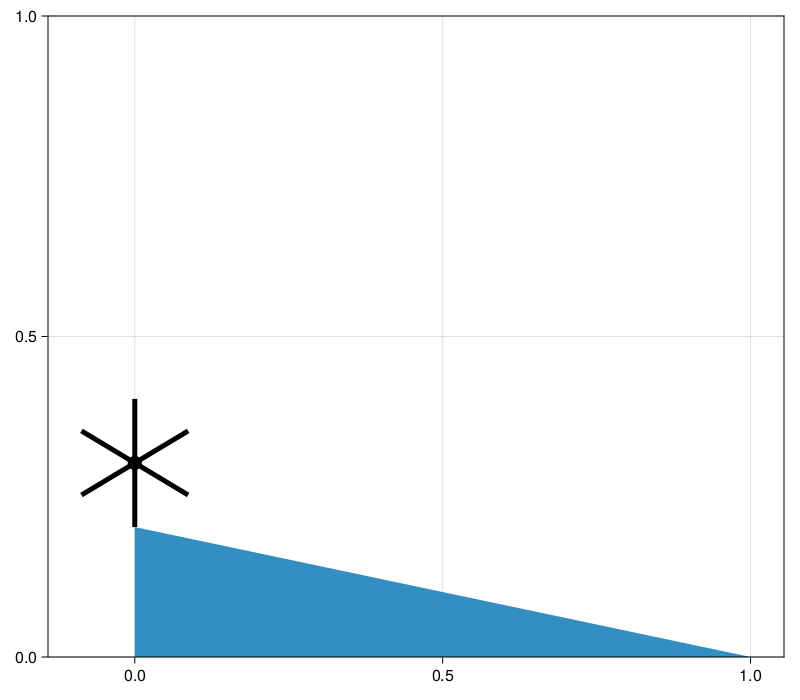

In [14]:
f

In [15]:
# Preallocate
z_ = zeros(2,T)
contact = [0,tan(γ)]

# Initial condition
z_0 = [0.0, 6.0]
z_[:,1] = z_0

record(f, "rimless-wheel+collision.mp4", 2:T; framerate=fps) do k
    
    # Forward simulation
    z_[:,k] = eom(z_[:,k-1], time[k])
    
    θk[] = z_[1,k]

    # Collision detection
    if collision_detection(z_[1,k], α=α, γ=γ)
        
        # Adjust contact point
        upcontact!(contact, α=α, γ=γ)
        cx[] = contact[1]
        cy[] = contact[2]
        
        # Process shock (velocity lost)
        z_[1,k] -= 2α
        z_[2,k] *= cos(2α)
    end       
    sleep(2/fps)
end

"rimless-wheel+collision.mp4"

In [16]:
display_mp4("rimless-wheel+collision.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQADCcRtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xOCBsb29rYWhlYWRfdGhyZWFkcz0zIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABNGZYiEAC///vdOvwKbRYV/64ClLugACIllGpcdmrDn+b3Jw4ok614KgutFjkvolBXoLIkh8pyRZquYa0bT8XPmUJBeKjBUq5tul4aEgnLK4AZxUff3rRX5LQHUFt2dtuXxM+i6NK/VHDA23+5gMpSLCmZuHugKjfFeVccrkxqJJoYxhSKshYwFqwAAAwAAAwAAAwAAC3iH/gYbRwpgSGuqzKIobo3Y9/nvcG4ip0PsubosHp/L0Zx9punfliTTXN7vAseSF2tJLi0CgmznysaZha3D0QQI9KvBs2X1Ag+yJmmwSTVtCZ6jLlO/3SF0NRneGE+DqPZXwIqDZdxds5GX3gWzuOJkd9/pxSC4IKxgmnrCgVH7bV09toa7zqmmIwetU67WC8zajU5o8pjK1i5y1u4fSNCcmqnOD5HedIPtL3AY2AGJ77QfdjfqaFFWFLohv/QIDZaYNd6Oi7BDtaFpMP9rgDsp8mIjER7YGYIaT/7YZZXwiO9JYzQFz06mOgqsd1EZ8AAl4ABXQf1BNFwRXM14+nLJpv4XUDSZGth0IxshQUTqyq+g2GdkhgbskLzdklejtzz3V+9SXONjeKdscUNO7EsR1V64Pqr3zd5oZOlNNGl9IWvmFc8OwYI8MkXFPpvKz62VXktkw8xMWt3EBmRgABc+m8YcWCTm/7hHoaN32YxBrgqtcax8ofHyhPVtcSzoCB2ybNzZClEwSTT42ewB/8LEFztdjfJX6DJ3TafyAkkx0e51JBHuXw8DVQSW9ksAhdwijZxrvpn2bBu0T6Oi3L+DyZUHq1LCXdRRPOlj0bojBrEY5wUh46P+G0uFT6BY4COqZ+yNt4O0Qz3wy/m8DV7xYXRleRDm100A8pFf5F4xpqa27hh6oWSW4sQCc7MaDZXzRkk7dXMzlNKcDmbjeqlgP//Rn39zO3/E/nydH8Psnve75Ks2s9ggP8UK6t+TPqvrWC1p06AQtwZ0uB48ajVALrvmR0Ndii6kEpxTSuuMLdNI43APLuxLmlTFuwsNJszfVF+FBMuBPtfwwKsIzN+KPWm+EKCgtJadiUcCs96cAhoRm1KwjR+qQmcTY4ninbal9HsVveO7lgK9aukKIGzktilwf9MP00F9a6h/0WA7XL5726pwYijqs0wMSn1ZoI7iAqy84Lxf6iURdKXMpO0zg0H5ZCAq7PDoW1vijQjavwsraXcs8WShucVCSXG1KYP+ts2LM735xFVDvLHvIR0pmQWtVKRP6efm4xo6J485h5g5M16uw+IIIwWpEkaevqk7Jwz1AUOEpuHHKHDTuEXGbdIwAd7kyyTqe21kmudeZXAHB8w52g1/mwhCCvW9/Pntt9pwaSBFQZOmLelTDKbBRRw3t9goM3YAIY+qz2K5LL4cSAUA7Kzax5IRh9qVKQ4m6hcGwdIgyUabwSphMrNPVgedIAYkTDOBNmnOBBTaoctRybHFVDJMpDCUzy+DwG2qF7VxL0+8Sylbnrv3KfpeJwgqrz0DySML3tWd5ELM7YgYo+bHSUonV9jfmT4fcQSrNi/ki7dLHd1Wb9foaSvK8TogAAADAARjQxf+I0z1yK78ScPcP9WKyYC1ypYkTfkv7OxFgZDfRXC6Ez6e+kMrIsvGGp0PhxUOXac5cdtHDeMyY8b2tLT6vPqLgElNcMAOkuUr4yEFMheBezM/79O2DAJMC4WPCC4eql8loF4UQ4xuxRIQwbhfPvkacl83p7swsWRJTnSsO6N0dH76IpfnS1UF+ihAJXB3Dl4f3dHc9Dadkdt+oSQdFjQHzRsrTa6LNPWwKRHoE6E61iTGrvGhbkpNm5OA1ZPP9ENdh6oqIsES3mlAXnRluH60H8/QmuDBtvIAGbXWGQRjQTUsPRtcrN+VaEmVkAAAVVDHHYtq1YfDxjQzzYSsoBY4LU/ppygQu+eNfuZskjB3yeSnel3Q7qE4G5s4v3GE/XSsqxjwvCbMg/ui9rIslTvJ4sRloYamgvvtSTkqP3lgL2CgARUCHIfRNX9qXxG+31FbPSEiJTCjv5GJ21m8aotcuotySeg+Zlg2OnpIo+yRcu0uISQHWgC/G8slLd5bU7g7aH/oKeGbSkkLAXo7TiQgbjM6jFLBPLEbjz8zqJaqqWAAABpmEi34PoV0n1VDjB3sFEOGMlfhtCciiqrxzncbZeGvF6XXHCESw83XX5p8yscRxrTPJU/RPglEEkjASRUzb613H87WK1SmWbxIm8y/TJy9Dd7e5bAAAJmWAvJNaomcqjuMMpDJ+B9k1afdj8YeTSVjfGwgnGaYeKWkF4OPvu1Ok8JsOGlpL3DeTo1m4KXZVNzEM/g3U/AbRsSxJpoBW848b810dc9UwOyqnBVQAMy8DKhEtRhRKWYG52CbDcRvCRAyjwsKE2qmbcwAKHQ/nEK0oNzbrdKH8lfRL71NQFa3/NoL9L+LjLPuFW3m/4MErABVdDC8CcpcdOQQxkHzHPye3SBFcM+eP5HqASPW6IeANZwUC7XySP9dbHXJJW1iBN0K9WdU4+iId/peSAo+blMzcuT1oJuaehdEyQ7YDnjbIbME4apXE2hlfCXchqaMQbHCBt39p8FAouatyutQ0kKLcAZNoFEOV3BkzXvYcyZGsJ8Da6/IXDxtflYp//aAUEucaQCTK87ZMdR4DvLw6p06UW7+Vv35w3yrrHR1/TG/sJKoBmEqIE2oqjbAP+Ka/gBP0N+5FX+6zkkzXr+XXHrFpd7lTcTNalYx5ERNK7CrjJ+ojIvVE3/1Z8sCTzyN11eFFn5ujw03DFXwNMojUgKY1q08XT9aZzqMClvhZEWDziNeq4cy1JeiJXRv6Nq3WZ6mcMK+5a0vSnphHqwRLf35kGPBV0pSp2JZ1mg+A2F91M61PQER8OWJu4RGGLqPP4XmyAVy136C5SDBfr18Xw9i+xVBRz3Shuiwkm7icBprIl/9ighFhee9zUeVnD3e+M0YGFX5gLCFDAyOPXgVqT+